In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
float_formatter = "{:.2f}".format
np.set_printoptions(formatter={'float_kind':float_formatter})

In [3]:
def hypothesis(X, theta):
    # X of shape m x (n+1)
    # theta of shape (n+1)x1
    # return h of shape m x 1
    
    X = X.T
    
    h = theta.T @ X
    
    return h.T

In [4]:
def cost_function(X, Y, theta):
    # shape of X : m x (n+1) 
    # shape of Y : m x 1
    # shape of h : m x 1
    
    m = X.shape[0]
    
    h = hypothesis(X, theta)
    
    J = (1/(2*m))*( np.sum((h-Y)**2) )
    
    return J

In [5]:
def get_gradients(h, Y, X):
    # shape of X : m x (n+1) 
    # shape of Y : m x 1
    # returns gradients of shape : (n+1) x 1
    
    m = X.shape[0]
    
    gradients = (1/m)*( (h-Y).T @ X  )
    
    return gradients.T

In [6]:
def gradient_descent(X, Y, theta, alpha):
    # shape of X : m x (n+1) 
    # shape of Y : m x 1
    # returns theta of shape: (n+1) x 1
    
    m = X.shape[0]
    losses = []    #J_history
    epoch=1

    while True:
        h = hypothesis(X, theta)
        gradients = get_gradients(h, Y, X)
        
        theta = theta - alpha*gradients
        
        losses.append(cost_function(X, Y, theta))
 
        if np.sum(np.abs(gradients)).round(3) == 0:
            print("Training Complete in {} epochs".format(epoch))
            break
            
        epoch+=1

    return theta, losses, epoch
 

In [7]:
def Linear_Regression(X, Y, alpha, plot=True):
    
    theta = np.zeros((X.shape[1], 1))
    
    theta, losses, nepochs = gradient_descent(X, Y, theta, alpha)

    J = cost_function(X, Y, theta)

    # plot cost
    plot_cost(losses, nepochs)
    
    if plot==True:
        plot_fitted_line(X, Y, theta)

    print("Cost: ", J)
    print("Learned Parameters: \n", theta)
    
    return theta

Helper functions

In [8]:
def load_data(filename):
    
    df = pd.read_csv(filename, sep=",", index_col=False, header=None)
    
    return df

In [9]:
def add_bias(df):
    
    df.insert(0, "intercept", 1)

    data = np.array(df, dtype='float')
    X = data[:,0:df.shape[1]-1]
    Y = data[:,df.shape[1]-1]

    Y = Y.reshape(X.shape[0],1)
    
    return X,Y

In [10]:
def normalize(X, bias_added=True):
    
    mu = X.mean(axis=0, keepdims=True)
    std = X.std(axis=0, keepdims=True)
    
    if bias_added==True:
        mu[0,0]=0
        std[0,0]=1
    
    X = (X-mu)/std
    
    return X, mu, std

def normalize_test(X, mu, std, bias_added=True):
    
    if bias_added==False:
        mu=mu[:,1:]
        std=std[:1:]
    
    X = (X-mu)/std
    
    return X

In [11]:
def plot_cost(losses, nepochs):
    
    nepochs = range(1,nepochs+1)
    losses = np.array(losses)
    
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Cost')
    plt.plot(nepochs, losses, 'm', linewidth = "5")
    plt.show()

In [12]:
def plot_data(X, Y):
    
    plt.figure()
    plt.xlabel('Population of City in 10,000s')
    plt.ylabel('Profit in $10,000s')
    plt.plot(X, Y, 'ro')
    plt.show()

In [13]:
def plot_fitted_line(X, Y, theta):
    
    y = hypothesis(X, theta)
    X = X[:,1].reshape(X.shape[0],1)
    
    plt.figure()
    plt.xlabel('Population of City in 10,000s')
    plt.ylabel('Profit in $10,000s')
    plt.plot(X, Y, 'ro')
    plt.plot(X, y, 'blue', linestyle='-')
    plt.show()


Training

In [14]:
filename = "lr_dataset1.txt"
    
df = load_data(filename)

df.columns = ["population", "profits"]
df.head()

,population,profits
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [15]:
print("Number of features in the dataset is {} with {} samples ".format(df.shape[1],df.shape[0]))

Number of features in the dataset is 2 with 97 samples 


In [16]:
X, Y = add_bias(df)

X, mu, std = normalize(X)

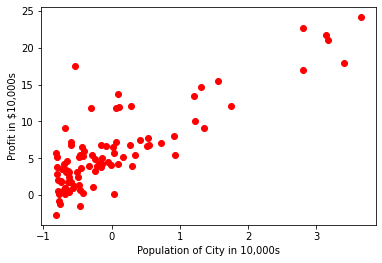

In [17]:
plot_data(X[:,1],Y)

Training Complete in 96 epochs


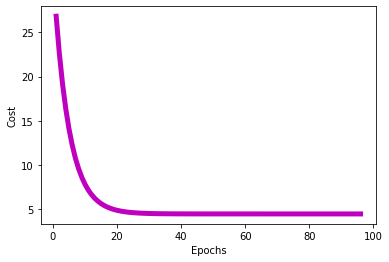

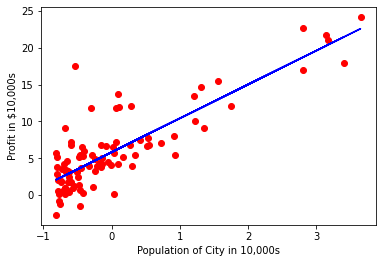

Cost:  4.4769714212028475
Learned Parameters: 
 [[5.84]
 [4.59]]


In [18]:
alpha = 0.1

theta = Linear_Regression(X, Y, alpha)

In [19]:
def test(X, theta, mu, std):
    
    X = normalize_test(X, mu, std)
    
    y = hypothesis(X, theta)
    
    return y

In [20]:
X_test = np.array([[1, 25]])

y = test(X_test, theta, mu, std)

print("Predicted Profit is : ", y)

Predicted Profit is :  [[25.93]]


Multivariate Case:

In [21]:
filename = "lr_dataset2.txt"

df = load_data(filename)

df.columns = ["sq-ft", "br", "price"]
df.head()

,sq-ft,br,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [22]:
print("Number of features in the dataset is {} with {} samples ".format(df.shape[1],df.shape[0]))

Number of features in the dataset is 3 with 47 samples 


In [23]:
X, Y = add_bias(df)

X, mu, std = normalize(X)

Training Complete in 411 epochs


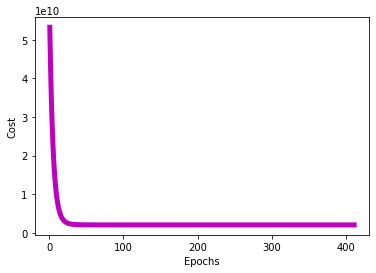

Cost:  2043280050.602829
Learned Parameters: 
 [[340412.66]
 [109447.80]
 [-6578.35]]


In [24]:
alpha = 0.1

theta = Linear_Regression(X, Y, alpha, False)

In [25]:
X_test = np.array([[1, 1600, 3]])

y = test(X_test, theta, mu, std)

print("Predicted price of the house is : ", y)

Predicted price of the house is :  [[286120.93]]
